In [10]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
with open('cvx_results_eval_raw.pkl', 'rb') as file:
    results = pickle.load(file)

In [12]:
import pandas as pd
results_lists = []
for res in results:
    res_dict = dict(
        data=res['data'],
        emb_dim=res['emb_dim'],
        w_gen=res['w_gen'],
        w_noise=res['w_noise'],
        w_train=res['w_train'],
        mse_gen=res['mse_gen'],
        mse_dec=res['mse_dec'],
    )
    results_lists.append(res_dict)
results_df = pd.DataFrame(results_lists)

In [13]:
take_log = lambda data: np.log(np.array([arr.item() for arr in data]))

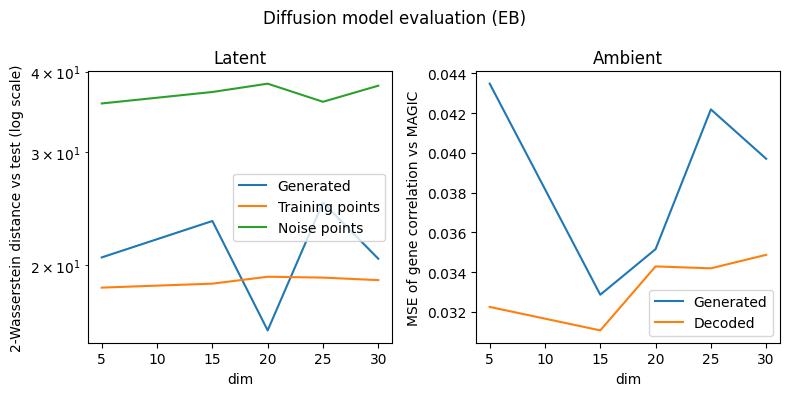

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
eb_res = results_df[results_df['data'] == 'eb_subset_all']
axes[0].plot(eb_res['emb_dim'], eb_res['w_gen'], label='Generated')
axes[0].plot(eb_res['emb_dim'], eb_res['w_train'], label='Training points')
axes[0].plot(eb_res['emb_dim'], eb_res['w_noise'], label='Noise points')
axes[0].set_xlabel('dim')
axes[0].set_ylabel('2-Wasserstein distance vs test (log scale)')
axes[0].legend()
axes[0].set_yscale('log')
axes[0].set_title('Latent')
axes[1].plot(eb_res['emb_dim'], eb_res['mse_gen'], label='Generated')
axes[1].plot(eb_res['emb_dim'], eb_res['mse_dec'], label='Decoded')
axes[1].set_xlabel('dim')
axes[1].set_ylabel('MSE of gene correlation vs MAGIC')
axes[1].legend()
axes[1].set_title('Ambient')
plt.suptitle('Diffusion model evaluation (EB)')
plt.tight_layout()
plt.show()

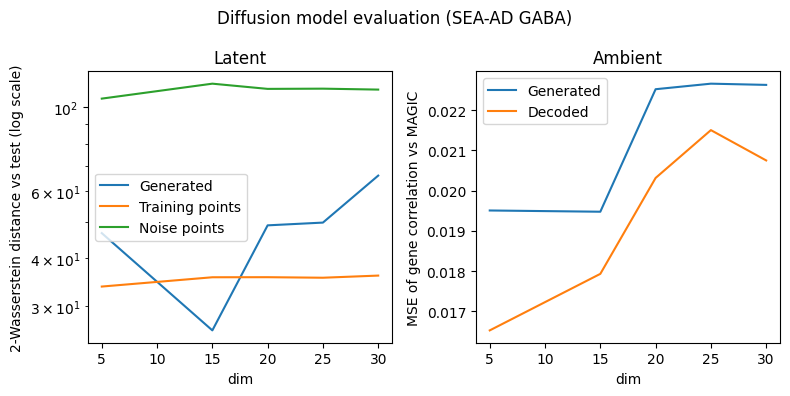

In [15]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
eb_res = results_df[results_df['data'] == 'sea_ad_gaba_all']
axes[0].plot(eb_res['emb_dim'], eb_res['w_gen'], label='Generated')
axes[0].plot(eb_res['emb_dim'], eb_res['w_train'], label='Training points')
axes[0].plot(eb_res['emb_dim'], eb_res['w_noise'], label='Noise points')
axes[0].set_xlabel('dim')
axes[0].set_ylabel('2-Wasserstein distance vs test (log scale)')
axes[0].legend()
axes[0].set_yscale('log')
axes[0].set_title('Latent')
axes[1].plot(eb_res['emb_dim'], eb_res['mse_gen'], label='Generated')
axes[1].plot(eb_res['emb_dim'], eb_res['mse_dec'], label='Decoded')
axes[1].set_xlabel('dim')
axes[1].set_ylabel('MSE of gene correlation vs MAGIC')
axes[1].legend()
axes[1].set_title('Ambient')
plt.suptitle('Diffusion model evaluation (SEA-AD GABA)')
plt.tight_layout()
plt.show()

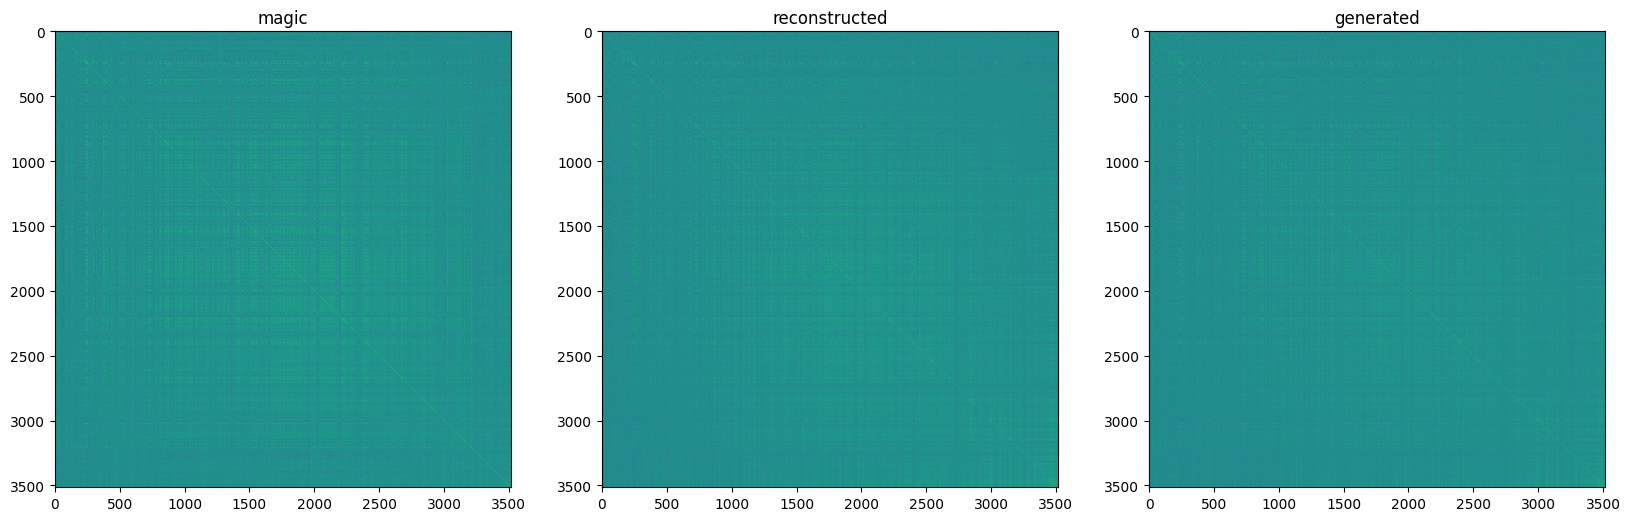

In [16]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(res['corrs_magic'])
plt.title('magic')
plt.subplot(1, 3, 2)
plt.imshow(res['corrs_dec'])
plt.title('reconstructed')
plt.subplot(1, 3, 3)
plt.imshow(res['corrs_gen'])
plt.title('generated')
plt.show()

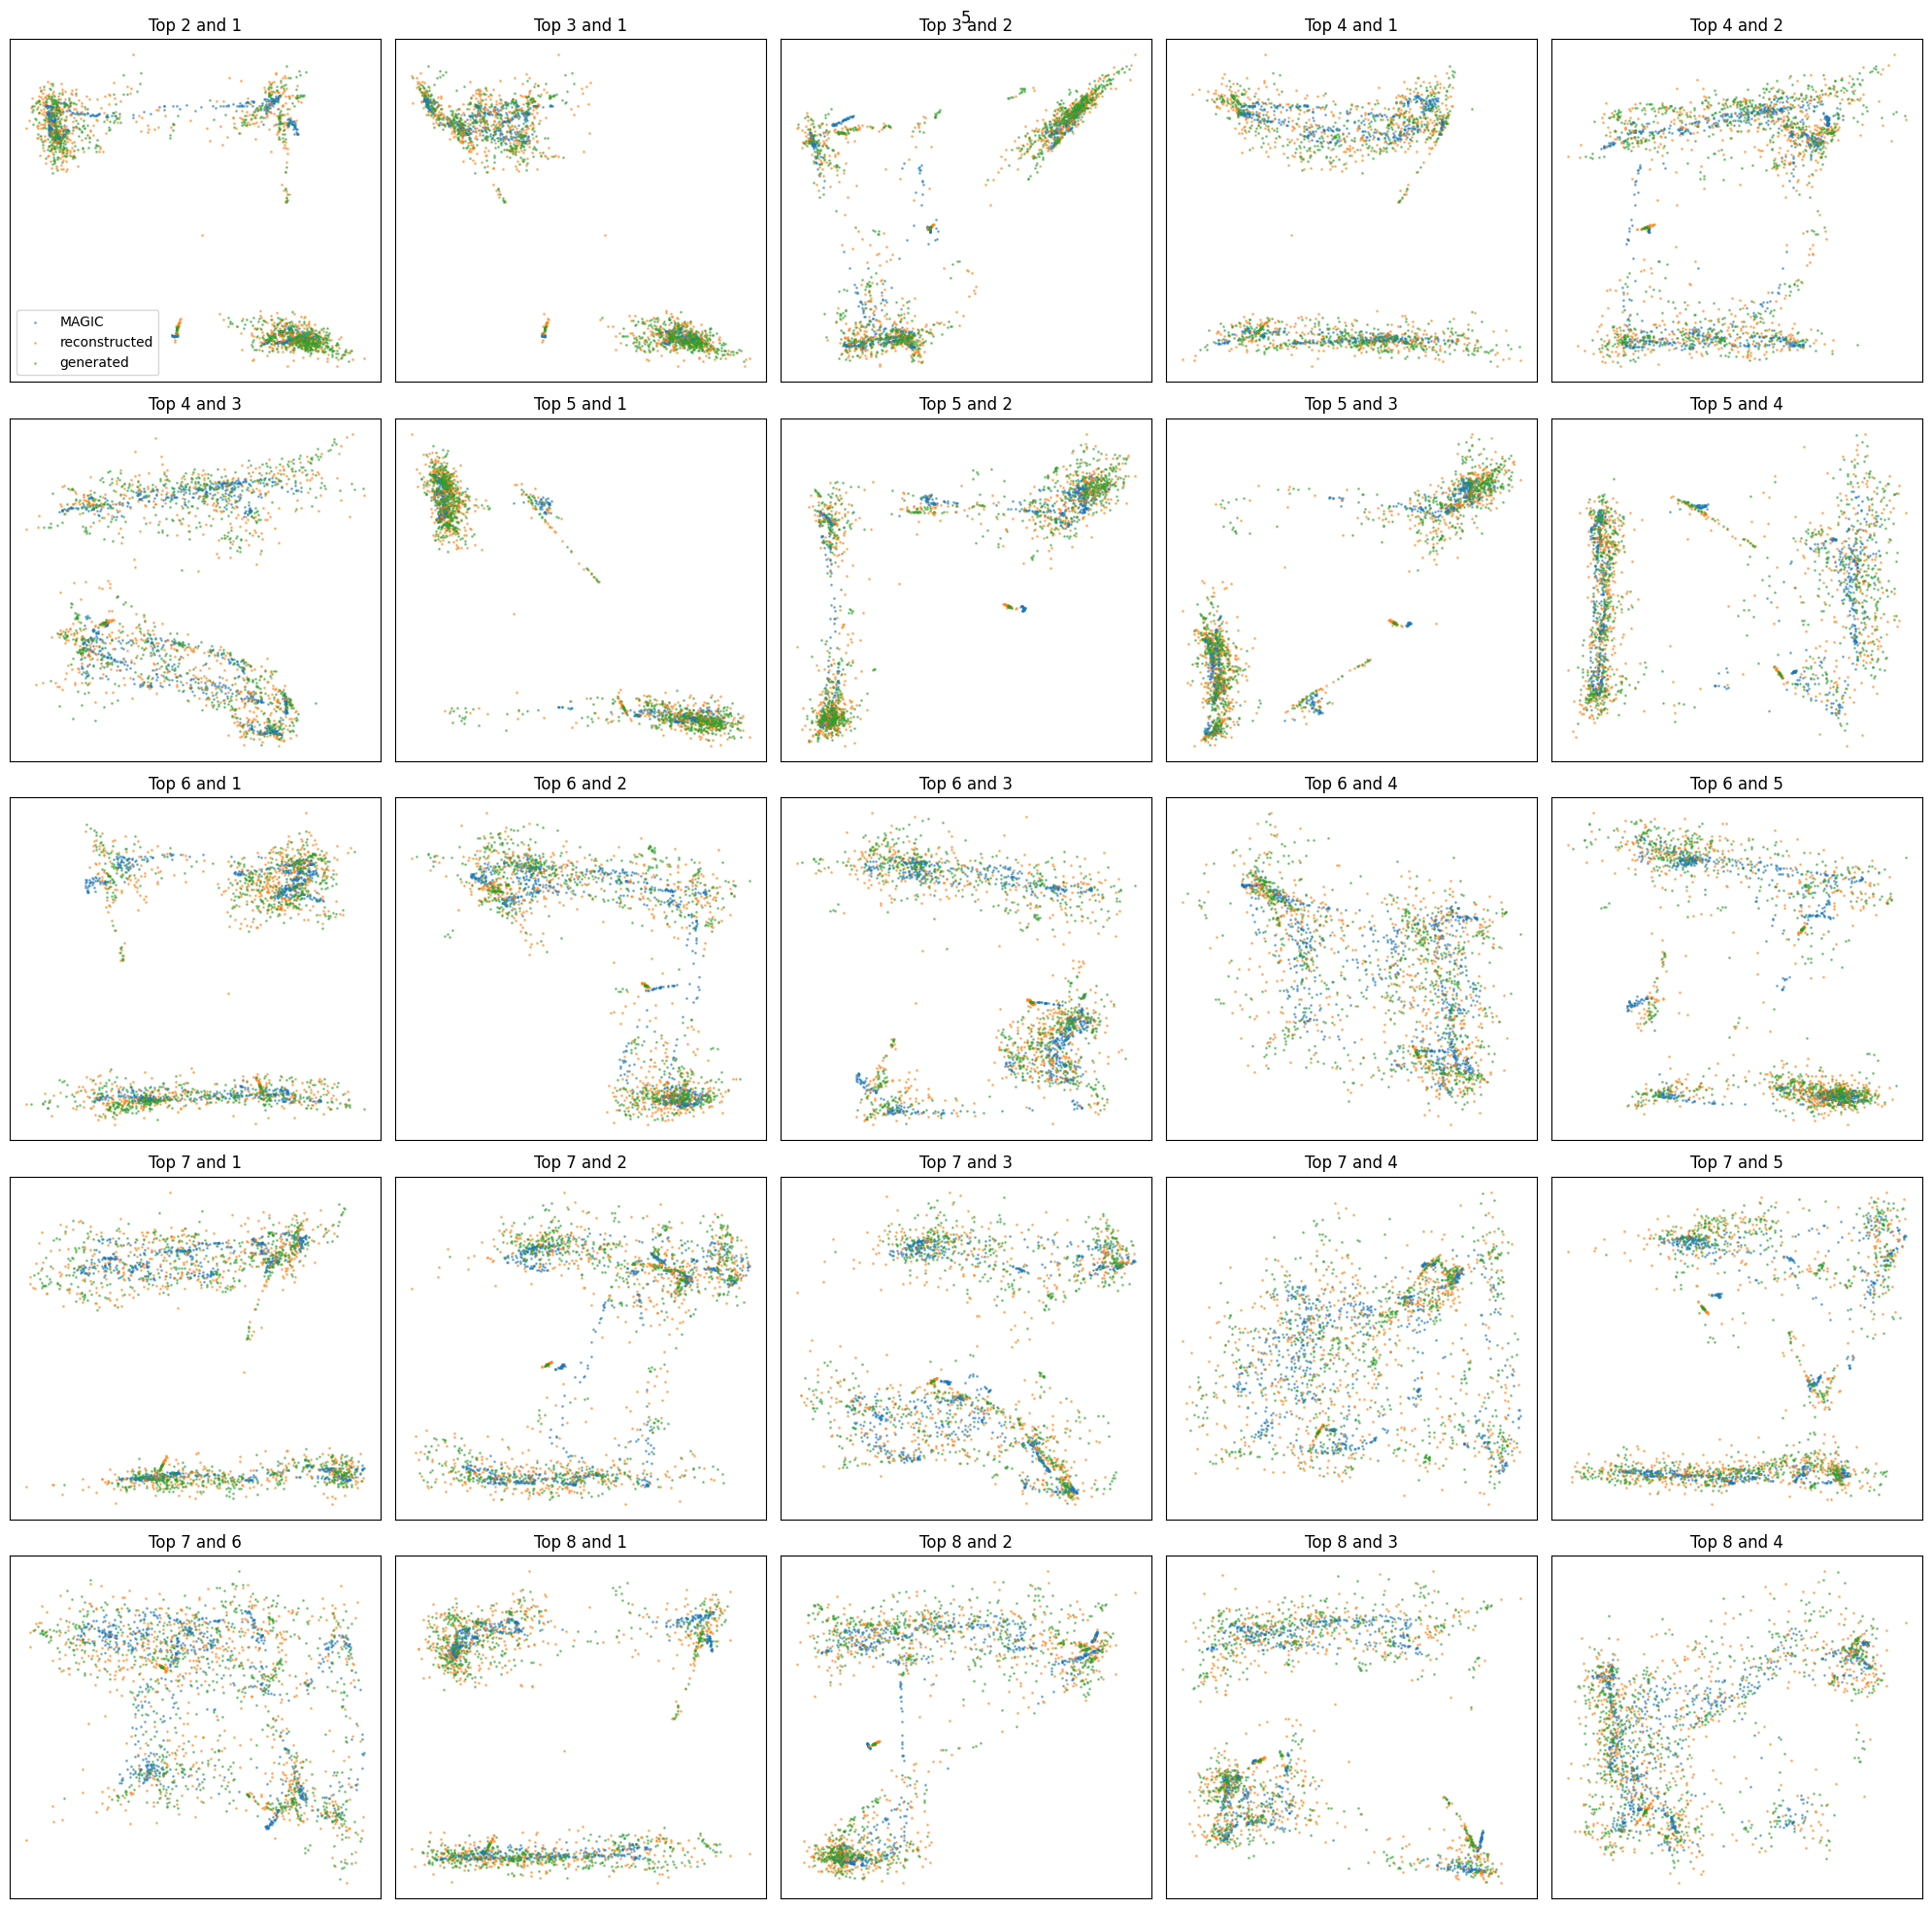

In [17]:
import matplotlib.pyplot as plt

# Initialize variables for managing the 5x5 grid and figure creation
fig_counter = 0
subplot_index = 1
max_subplots_per_fig = 25  # 5x5 grid
fig = plt.figure(figsize=(20, 20))  # Increase figsize as needed

for i in range(10):
    for j in range(i):
        # Check if the current figure's subplot limit has been reached
        if subplot_index > max_subplots_per_fig:
            break
            # # Show the current figure and start a new figure
            # plt.show()
            # fig_counter += 1
            # subplot_index = 1  # Reset subplot index for the new figure
            # fig = plt.figure(fig_counter, figsize=(20, 20))  # Create a new figure with a larger size

        # Create a subplot in the current figure
        ax = fig.add_subplot(5, 5, subplot_index)
        ax.scatter(res['orig_magic'][:,res['top_100_idx'][i]], res['orig_magic'][:,res['top_100_idx'][j]], s=1, alpha=0.5, label='MAGIC' if subplot_index == 1 else "")
        ax.scatter(res['orig_dec'][:,res['top_100_idx'][i]], res['orig_dec'][:,res['top_100_idx'][j]], s=1, alpha=0.5, label='reconstructed' if subplot_index == 1 else "")
        ax.scatter(res['orig_gen'][:,res['top_100_idx'][i]], res['orig_gen'][:,res['top_100_idx'][j]], s=1, alpha=0.5, label='generated' if subplot_index == 1 else "")
        ax.set_title(f'Top {i+1} and {j+1}')
        ax.set_xticks([])
        ax.set_yticks([])
        # Increment the subplot index
        subplot_index += 1

        # Add the legend to the first subplot of each figure for clarity
        if subplot_index == 2:
            ax.legend()


# Show the last figure
plt.suptitle('5')
plt.tight_layout()
plt.show()


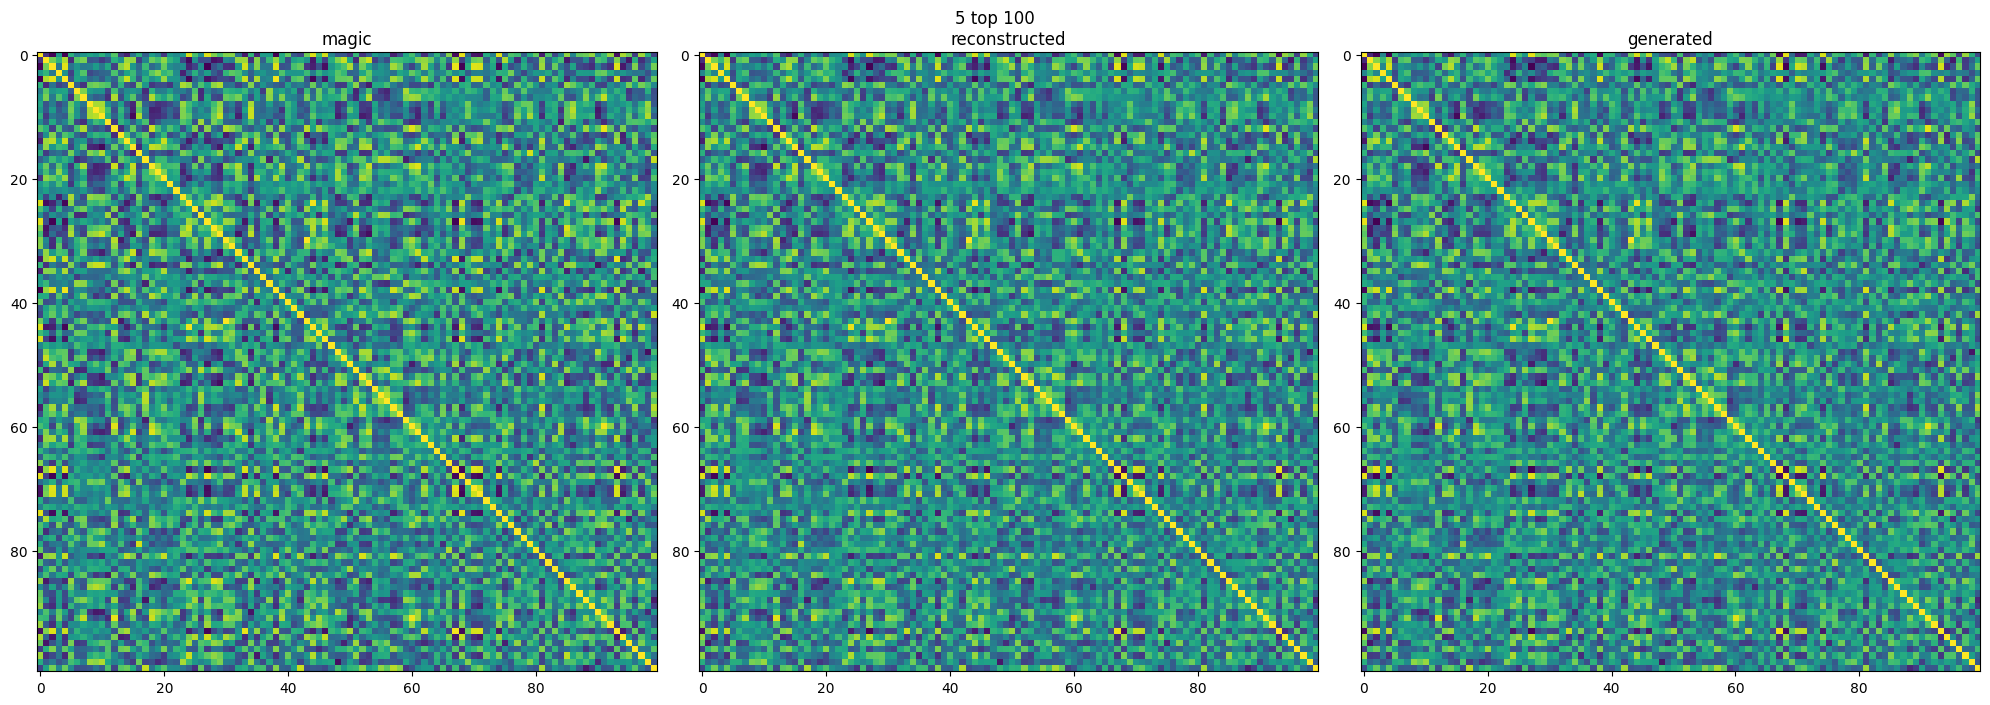

In [18]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 3, 1)
plt.imshow(res['corrs_magic'][:100][:,:100])
plt.title('magic')
plt.subplot(1, 3, 2)
plt.imshow(res['corrs_dec'][:100][:,:100])
plt.title('reconstructed')
plt.subplot(1, 3, 3)
plt.imshow(res['corrs_gen'][:100][:,:100])
plt.title('generated')
plt.suptitle('5 top 100')
plt.tight_layout()
plt.show()

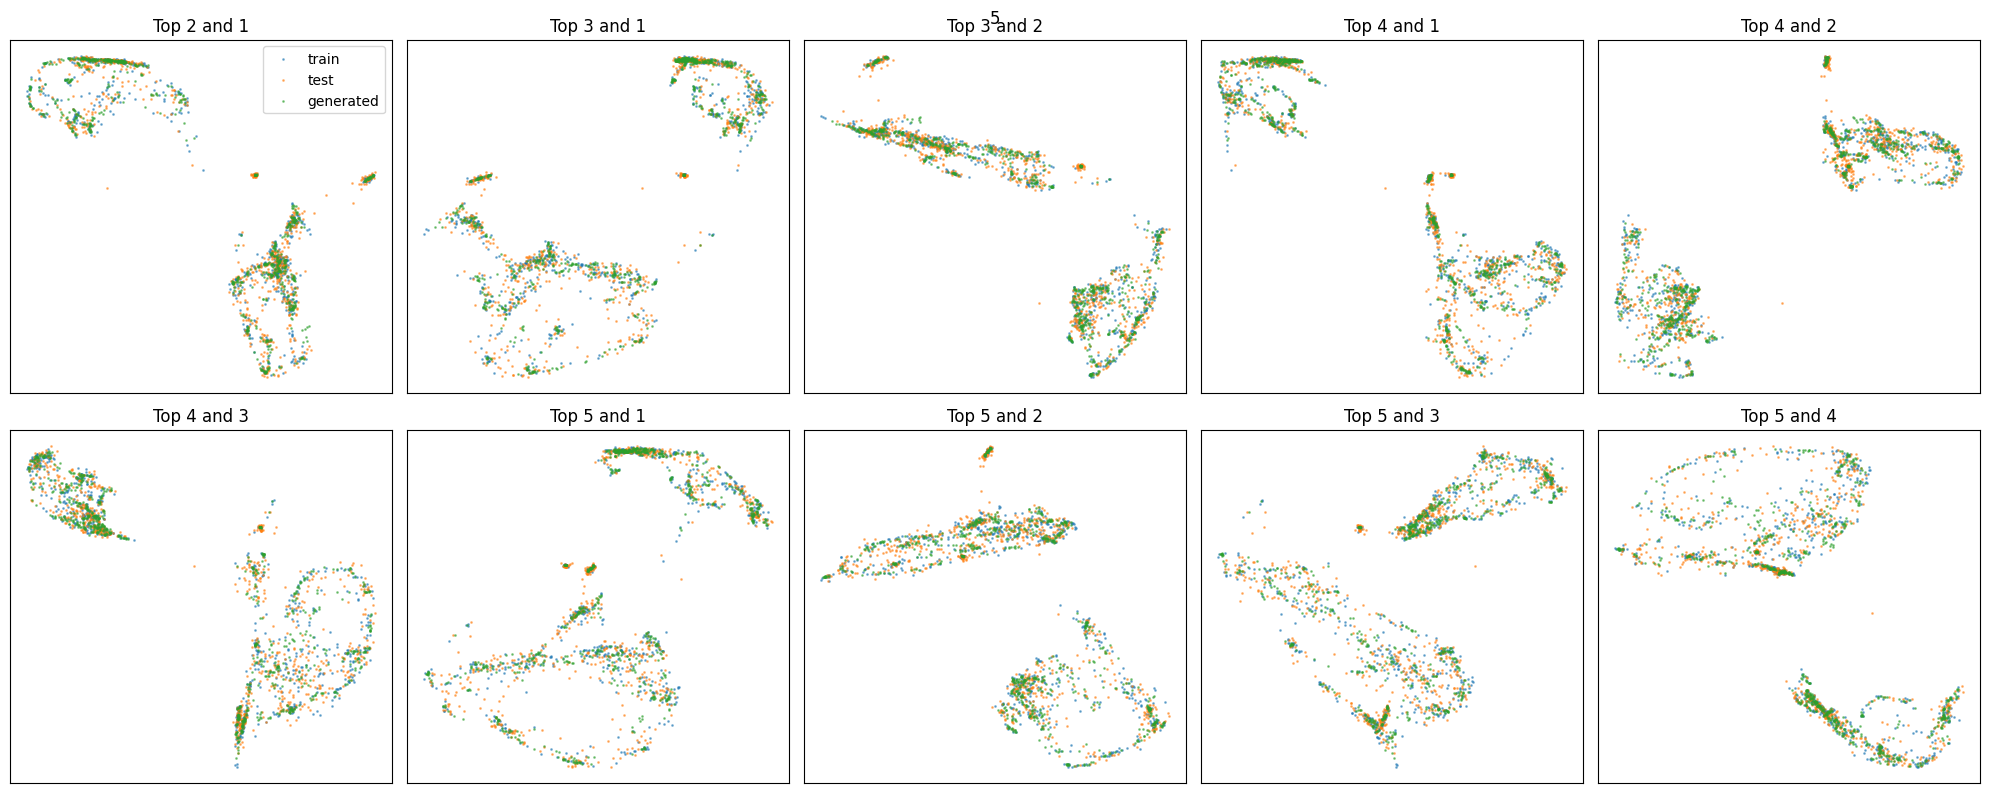

In [19]:
import matplotlib.pyplot as plt

# Initialize variables for managing the 5x5 grid and figure creation
fig_counter = 0
subplot_index = 1
max_subplots_per_fig = 25  # 5x5 grid
fig = plt.figure(figsize=(20, 20))  # Increase figsize as needed

for i in range(5):
    for j in range(i):
        # Check if the current figure's subplot limit has been reached
        if subplot_index > max_subplots_per_fig:
            break
            # # Show the current figure and start a new figure
            # plt.show()
            # fig_counter += 1
            # subplot_index = 1  # Reset subplot index for the new figure
            # fig = plt.figure(fig_counter, figsize=(20, 20))  # Create a new figure with a larger size

        # Create a subplot in the current figure
        ax = fig.add_subplot(5, 5, subplot_index)
        ax.scatter(res['latent_train_subset'][:,i], res['latent_train_subset'][:,j], s=1, alpha=0.5, label='train' if subplot_index == 1 else "")
        ax.scatter(res['latent_test'][:,i], res['latent_test'][:,j], s=1, alpha=0.5, label='test' if subplot_index == 1 else "")
        ax.scatter(res['latent_gen'][:,i], res['latent_gen'][:,j], s=1, alpha=0.5, label='generated' if subplot_index == 1 else "")
        ax.set_title(f'Top {i+1} and {j+1}')
        ax.set_xticks([])
        ax.set_yticks([])
        # Increment the subplot index
        subplot_index += 1

        # Add the legend to the first subplot of each figure for clarity
        if subplot_index == 2:
            ax.legend()


# Show the last figure
plt.suptitle('5')
plt.tight_layout()
plt.show()
